In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
# Define the file path
file_path = r"C:\Users\mrell\OneDrive\Desktop\job_descriptions.csv"

# Load the CSV file into a DataFrame
job_data = pd.read_csv(file_path)

# Display the first few rows of the data
print("First 5 rows of the dataset:")
print(job_data.head())


First 5 rows of the dataset:
             Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern         26801  ...   
1      Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3             Benin    9.3077     2.3158  Full-Time        129896  ...   
4             Chile  -35.6751   -71.5429     Intern         53944  ...   

                 Contact                     Job Title  \

In [13]:

# Display basic information about the dataset
print("\nDataset Info:")
print(job_data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(job_data.describe())

# Check for missing values
print("\nMissing Values:")
print(job_data.isnull().sum())

# Drop rows with missing values
job_data_cleaned = job_data.dropna()




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null

In [14]:
# Display the shape of the cleaned dataset
print("\nShape of the dataset after dropping missing values:")
print(job_data_cleaned.shape)

# Check for duplicate rows
print("\nDuplicate Rows:")
print(job_data_cleaned.duplicated().sum())

# Drop duplicate rows
job_data_cleaned = job_data_cleaned.drop_duplicates()




Shape of the dataset after dropping missing values:
(1610462, 23)

Duplicate Rows:
0


In [15]:
# Display the shape of the dataset after removing duplicates
print("\nShape of the dataset after removing duplicates:")
print(job_data_cleaned.shape)

# Display column names to understand the structure
print("\nColumn Names:")
print(job_data_cleaned.columns)




Shape of the dataset after removing duplicates:
(1610462, 23)

Column Names:
Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [16]:
# Group by a specific column (e.g., 'Job Title') and count occurrences
if 'Job Title' in job_data_cleaned.columns:
    print("\nJob Title Counts:")
    print(job_data_cleaned['Job Title'].value_counts())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(job_data_cleaned.describe())




Job Title Counts:
Job Title
UX/UI Designer                  48376
Digital Marketing Specialist    27881
Software Engineer               27537
Network Engineer                24307
Software Tester                 20871
                                ...  
QA Engineer                      3431
Personal Assistant               3429
Procurement Coordinator          3415
Key Account Manager              3394
Inventory Analyst                3335
Name: count, Length: 147, dtype: int64

Summary Statistics for Numerical Columns:
             Job Id      latitude     longitude  Company Size
count  1.610462e+06  1.610462e+06  1.610462e+06  1.610462e+06
mean   1.548978e+15  1.937873e+01  1.640275e+01  7.370378e+04
std    8.946738e+14  2.355602e+01  7.066469e+01  3.529832e+04
min    1.817948e+11 -4.090060e+01 -1.751982e+02  1.264600e+04
25%    7.740660e+14  5.152100e+00 -1.518040e+01  4.311400e+04
50%    1.547972e+15  1.807080e+01  1.914510e+01  7.363350e+04
75%    2.323738e+15  3.907420e+01  4.

In [17]:
# Text Vectorization using TfidfVectorizer
if 'Job Description' in job_data_cleaned.columns:
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    job_desc_vectors = vectorizer.fit_transform(job_data_cleaned['Job Description'])
    print("\nTF-IDF Matrix Shape:")
    print(job_desc_vectors.shape)



TF-IDF Matrix Shape:
(1610462, 1000)


In [18]:

# Clustering using KMeans
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
job_data_cleaned['Cluster'] = kmeans.fit_predict(job_desc_vectors)
print("\nCluster Assignments:")
print(job_data_cleaned[['Job Description', 'Cluster']].head())




Cluster Assignments:
                                     Job Description  Cluster
0  Social Media Managers oversee an organizations...        1
1  Frontend Web Developers design and implement u...        0
2  Quality Control Managers establish and enforce...        3
3  Wireless Network Engineers design, implement, ...        4
4  A Conference Manager coordinates and manages c...        2


In [19]:
# Classification Example: Predict 'Job Category' based on 'Job Description'
if 'Job Category' in job_data_cleaned.columns and 'Job Description' in job_data_cleaned.columns:
    X = job_desc_vectors
    y = job_data_cleaned['Job Category']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



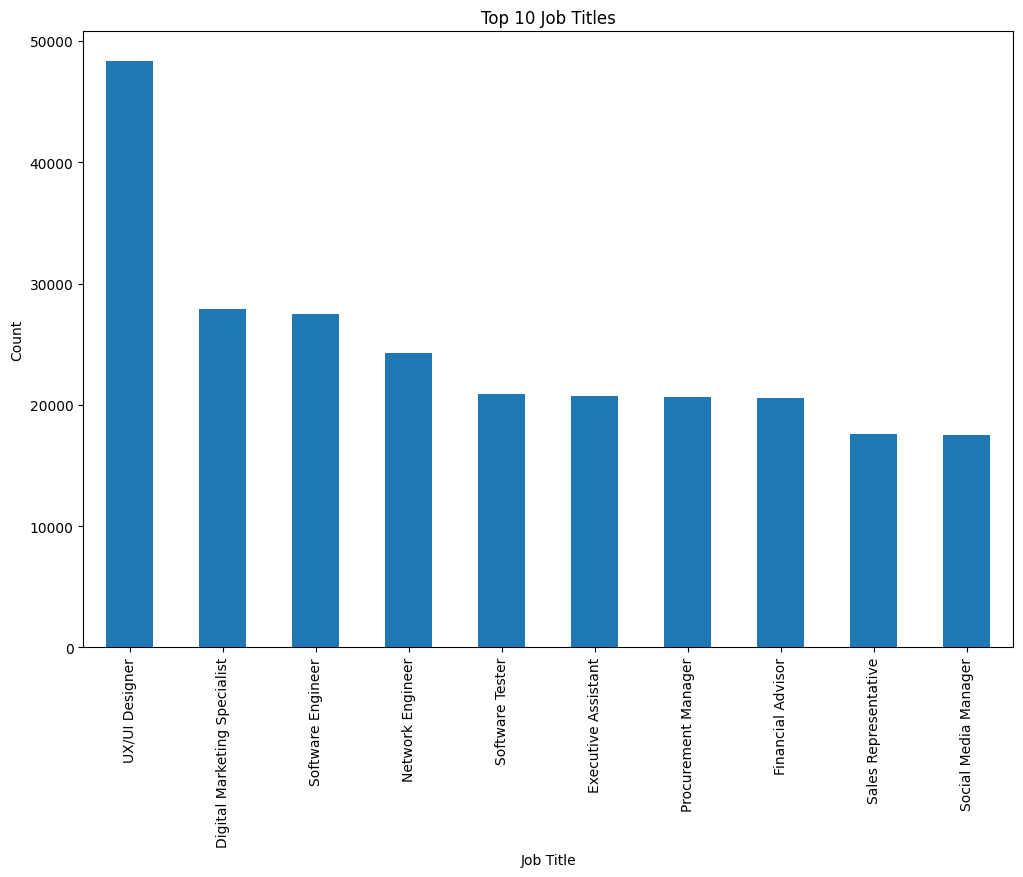

In [20]:
# Visualization: Plot the distribution of a numerical column
if 'Salary' in job_data_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(job_data_cleaned['Salary'], kde=True, bins=30)
    plt.title("Salary Distribution")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()

# Bar plot for job titles
if 'Job Title' in job_data_cleaned.columns:
    plt.figure(figsize=(12, 8))
    job_data_cleaned['Job Title'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Job Titles")
    plt.xlabel("Job Title")
    plt.ylabel("Count")
    plt.show()